<a href="https://colab.research.google.com/github/mukmookk/hanium_DemandForcast/blob/main/%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1_0518_%EA%B9%80%EC%98%81%EB%AC%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **수요 예측 프로젝트 EDR**
0518 김영묵



In [ ]:
%matplotlib inline

import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import rcParams
import os

rcParams['figure.figsize'] = 14, 8

In [ ]:
# 데이터 마운트
from google.colab import drive
drive.mount('/content/drive')

# Ecommerce 데이터 경로
target_dir = "/content/drive/MyDrive/수요예측/1. 이커머스 FC주문 데이터/"

# 파일 병합(CONCAT)을 위한 사전 작업
all_csvs = glob.glob(os.path.join(target_dir, "*.csv"))
df_from_each = (pd.read_csv(f) for f in all_csvs)

# "1-x. 이커머스 FC주문 데이터_x월" 형식의 csv 파일 병합(CONCAT)
df_ecomm = pd.concat(df_from_each, ignore_index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


In [ ]:
df_ecomm['BKG_DATE'].apply(lambda x : str(x))
df_ecomm['BKG_DATE'] = pd.to_datetime(df_ecomm['BKG_DATE'], format='%Y%m%d')

In [ ]:
df_ecomm.dtypes

CORP_ID                       object
REF_ORD_NO                    object
BKG_NO                        object
BKG_TYP                        int64
BKG_DATE              datetime64[ns]
BKG_TIME                       int64
SHPR_CD                        int64
INV_AMT                      float64
ITEM_SEQ                       int64
ITEM_CD                       object
BRAND_NM                      object
ITEM_QTY                       int64
ITEM_AMT                     float64
IF_YN                         object
ORDER_CRT_DATETIME           float64
DLV_DV                       float64
REF_ITEM_SEQ                  object
ORDER_IDX                     object
ORDER_YN                      object
DLVPREARRBRANCD               object
DLVPREARREMPNICKNM            object
DLVCLSFCD                     object
DLVSUBCLSFCD                  object
INS_ID                        object
INS_DATE                       int64
INS_TIME                       int64
POST_ZONE                    float64
S

In [ ]:
df_ecomm_dropped = df_ecomm.drop([
                                  'REF_ORD_NO', 'CORP_ID', 'BKG_NO', 'BKG_TYP', 'SHPR_CD', 'INV_AMT', 'ITEM_SEQ', 
                                  'ITEM_CD', 'BRAND_NM', 'IF_YN', 'ORDER_CRT_DATETIME', 'DLV_DV', 
                                  'ORDER_IDX', 'DLVPREARRBRANCD', 'DLVPREARREMPNICKNM',
                                  'DLVCLSFCD', 'DLVSUBCLSFCD', 'INS_ID', 'INS_DATE', 'INS_TIME', 'POST_ZONE', 'SPLIT_EXEC_YN'], axis=1)
df_ecomm_dropped.head()

,BKG_DATE,BKG_TIME,ITEM_QTY,ITEM_AMT,REF_ITEM_SEQ,ORDER_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,2021-03-03,35510,1,14900.0,2021030323885041,Y,세종특별자치시,NaN,서울특별시,서대문구
1,2021-03-03,35521,1,20900.0,2021030323885721,Y,경기도,광주시,경상남도,김해시
2,2021-03-03,35513,1,37900.0,2021030323887981,Y,경기도,광주시,경상남도,거제시
3,2021-03-03,35608,1,69800.0,2021030323895281,Y,경기도,광주시,서울특별시,서초구
4,2021-03-03,35551,1,39800.0,2021030323897651,Y,경기도,광주시,경기도,김포시


In [ ]:
df_ecomm_dropped = df_ecomm_dropped.loc[(df_ecomm['ORDER_YN'] == 'Y')]
# df_ecomm_dropped['BKG_DATE'] = df_ecomm_dropped['BKG_DATE'].apply(lambda x : int(str(x)[4:]))


df_ecomm_dropped.set_index('BKG_DATE', inplace=True)

In [ ]:
df_ecomm_dropped.tail(10)

,BKG_TIME,ITEM_QTY,ITEM_AMT,REF_ITEM_SEQ,ORDER_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
BKG_DATE,,,,,,,,,
2021-06-28,91210,100,NaN,00085,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,92,NaN,00083,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,100,NaN,00224,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,200,NaN,00062,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,100,NaN,00263,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,100,NaN,00281,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,168,NaN,00316,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,100,NaN,00338,Y,경기도,군포시,경기도,NaN
2021-06-28,91210,50,NaN,00183,Y,경기도,군포시,경기도,NaN


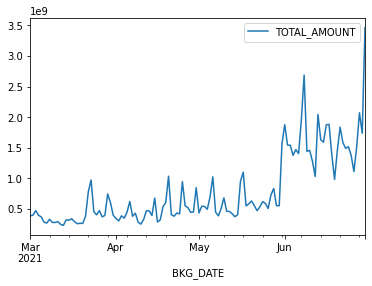

In [ ]:
new_column = {'ITEM_AMT': 'TOTAL_AMOUNT'}

groupby_ecomm_AMT = df_ecomm_dropped.drop(['BKG_TIME'], axis=1).rename(columns=new_column).groupby(['BKG_DATE'], sort=True)['TOTAL_AMOUNT'].sum()
groupby_ecomm_AMT.plot(legend=True)


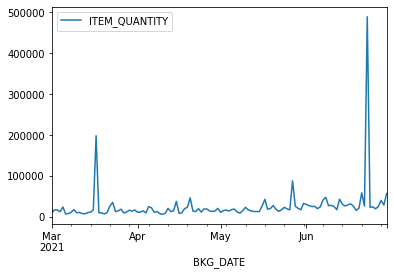

In [ ]:
new_column = {'ITEM_QTY': 'ITEM_QUANTITY'}
groupby_ecomm_QUA = df_ecomm_dropped.drop(['BKG_TIME'], axis=1).rename(columns=new_column).groupby(['BKG_DATE'], sort=True)['ITEM_QUANTITY'].sum()
groupby_ecomm_QUA.plot(legend=True)

In [ ]:
df_ecomm_dropped.groupby(df_ecomm_dropped.date.dt.month)['ITEM_AMT'].sum()

AttributeError: ignored